In [ ]:
%pip install git+https://github.com/WongKinYiu/YOLO.git

In [2]:
import random
from io import BytesIO
from pathlib import Path
from tempfile import NamedTemporaryFile
from typing import Collection, Literal, Mapping, NamedTuple, Sequence, cast

import requests
import torch
from IPython.display import display  # type: ignore
from omegaconf import OmegaConf
from PIL import Image, ImageDraw, ImageFont
from yolo import (
    AugmentationComposer,
    PostProcess,
    create_converter,  # type: ignore
)
from yolo.config.config import DatasetConfig, ModelConfig, NMSConfig
from yolo.model.yolo import YOLO


### Constants

Here we define a few constants that we will use, including the URLs for the model weights and model configs

We also specify the `DEVICE_TO_USE` to run the model. If you have an NVIDIA GPU, you can change to `"cuda"`.


In [3]:
YOLO_V9_C_CONFIG_URL: str = "https://raw.githubusercontent.com/MultimediaTechLab/YOLO/80efa29b2bf1e1a411a6376eac8a3449e0ae710f/yolo/config/model/v9-c.yaml"
YOLO_V9_C_MODEL_URL: str = (
    "https://github.com/MultimediaTechLab/YOLO/releases/download/v1.0-alpha/v9-c.pt"
)
YOLO_V9_C_DATASET_URL: str = "https://raw.githubusercontent.com/MultimediaTechLab/YOLO/80efa29b2bf1e1a411a6376eac8a3449e0ae710f/yolo/config/dataset/coco.yaml"

DEVICE_TO_USE: Literal["cpu", "cuda", "mps"] = "cpu"

### Load YOLO Models and Configs


In [4]:
def download_file(url: str) -> BytesIO:
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    return BytesIO(response.content)

In [5]:
def load_model_config(config_url: str) -> ModelConfig:
    config_file = download_file(config_url)
    return cast(ModelConfig, OmegaConf.load(config_file))

In [6]:
def load_dataset_config(dataset_url: str) -> DatasetConfig:
    config_file = download_file(dataset_url)
    return cast(DatasetConfig, OmegaConf.load(config_file))

In [7]:
def load_model(model_config: ModelConfig, model_weight_url: str) -> YOLO:
    with NamedTemporaryFile() as model_weight_file:
        model_weight_file.write(download_file(model_weight_url).read())

        model = YOLO(model_cfg=model_config, class_num=80)
        model.save_load_weights(Path(model_weight_file.name))

        return model.eval()

In [8]:
def get_post_processor(
    model_config: ModelConfig, model: YOLO, device: str
) -> PostProcess:
    converter = create_converter("v9-c", model, model_config.anchor, (640, 640), device)

    post_processor = PostProcess(
        converter,
        nms_cfg=NMSConfig(
            min_confidence=0.2,
            min_iou=0.2,
            max_bbox=300,
        ),
    )
    return post_processor

In [9]:
def get_input_transform() -> AugmentationComposer:
    return AugmentationComposer([])

In [10]:
yolo_model_config = load_model_config(YOLO_V9_C_CONFIG_URL)
dataset_config = load_dataset_config(YOLO_V9_C_DATASET_URL)
yolo_model = load_model(yolo_model_config, YOLO_V9_C_MODEL_URL)
post_processor = get_post_processor(yolo_model_config, yolo_model, "cpu")
input_transform = get_input_transform()

[02/07/25 17:00:23] INFO     🚜 Building YOLO                                                            ]8;id=50464;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py\yolo.py]8;;\:]8;id=200614;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py#35\35]8;;\

                    INFO       🏗  Building backbone                                                      ]8;id=196423;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py\yolo.py]8;;\:]8;id=426634;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py#38\38]8;;\

                    INFO       🏗  Building neck                                                          ]8;id=357445;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py\yolo.py]8;;\:]8;id=517214;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py#38\38]8;;\

                    INFO       🏗  Building head                                                          ]8;id=619360;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py\yolo.py]8;;\:]8;id=734633;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py#38\38]8;;\

                    INFO       🏗  Building detection                                                     ]8;id=560875;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py\yolo.py]8;;\:]8;id=461392;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py#38\38]8;;\

                    INFO       🏗  Building auxiliary                                                     ]8;id=756758;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py\yolo.py]8;;\:]8;id=650091;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/model/yolo.py#38\38]8;;\

[02/07/25 17:00:24] INFO     🈶 Found stride of model [8, 16, 32]                         ]8;id=794187;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/utils/bounding_box_utils.py\bounding_box_utils.py]8;;\:]8;id=934548;file:///opt/homebrew/Caskroom/miniforge/base/envs/examples/lib/python3.11/site-packages/yolo/utils/bounding_box_utils.py#343\343]8;;\

### Fetch images for input


In [11]:
def get_images_from_urls(
    image_urls: list[str], long_edge_size: int | None = 1000
) -> Sequence[Image.Image]:
    def resize_long_edge(
        image: Image.Image,
        long_edge_size: int,
    ) -> Image.Image:
        width, height = image.size
        if width > height:
            return image.resize((long_edge_size, int(height * long_edge_size / width)))
        else:
            return image.resize((int(width * long_edge_size / height), long_edge_size))

    images = [Image.open(download_file(image_url)) for image_url in image_urls]

    if long_edge_size is not None:
        images = [resize_long_edge(image, long_edge_size) for image in images]

    return images


def get_input_for_inference(
    pil_images: Collection[Image.Image],
) -> tuple[torch.Tensor, torch.Tensor]:
    """
    This function takes a list of PIL images and returns the transformed images and the reverse transform.
    """
    images_t, _bbox, reverse_t = zip(*[
        input_transform(pil_image) for pil_image in pil_images
    ])

    return torch.stack(images_t), torch.stack(reverse_t)

In [12]:
IMAGE_URLS = [
    "https://dragoneye-public.s3.us-east-1.amazonaws.com/sample_images/animals/petting_zoo.jpeg",
    "https://dragoneye-public.s3.us-east-1.amazonaws.com/sample_images/vehicles_and_transportation/5.jpg",
    "https://dragoneye-public.s3.us-east-1.amazonaws.com/sample_images/sports_equipment/8.jpg",
    "https://dragoneye-public.s3.us-east-1.amazonaws.com/sample_images/vehicles_and_transportation/1.jpg",
    "https://dragoneye-public.s3.us-east-1.amazonaws.com/demo-images/household_items/full-size/1.webp",
]

input_images = get_images_from_urls(IMAGE_URLS)
input_images_tensor, reverse_transform_tensor = get_input_for_inference(input_images)

### Run the images through the YOLO model


In [13]:
with torch.no_grad():
    outputs = yolo_model(input_images_tensor)
    model_results = post_processor(outputs, reverse_transform_tensor)


Let's see what the model_results look like


In [14]:
for idx, model_result in enumerate(model_results):
    print(f"Model Result - Image {idx} - {IMAGE_URLS[idx]}")
    print(f"{model_result}\n")

Model Result - Image 0 - https://dragoneye-public.s3.us-east-1.amazonaws.com/sample_images/animals/petting_zoo.jpeg
tensor([[1.8000e+01, 7.7826e+02, 3.9666e+02, 1.0004e+03, 7.4068e+02, 9.5256e-01],
        [1.8000e+01, 3.1964e+01, 3.4226e+02, 2.5446e+02, 6.2285e+02, 8.9936e-01],
        [1.8000e+01, 5.7708e+02, 3.2667e+02, 7.3710e+02, 5.5922e+02, 8.1959e-01],
        [1.8000e+01, 1.9192e+02, 2.5317e+02, 4.8768e+02, 6.4959e+02, 8.1771e-01],
        [1.8000e+01, 2.5275e+02, 1.0241e+02, 5.5295e+02, 2.9830e+02, 7.6721e-01],
        [4.5000e+01, 1.3138e-01, 4.9420e+02, 1.3274e+02, 6.5909e+02, 7.1634e-01],
        [1.8000e+01, 1.3661e-01, 3.5934e+02, 8.7232e+01, 4.9622e+02, 6.2881e-01],
        [1.8000e+01, 5.1645e+02, 2.5795e+02, 6.7706e+02, 3.5006e+02, 5.4417e-01],
        [1.8000e+01, 9.5118e+02, 3.0784e+02, 9.9960e+02, 4.0446e+02, 5.1172e-01],
        [1.8000e+01, 7.4297e+02, 3.4075e+02, 9.7493e+02, 4.1879e+02, 5.1170e-01],
        [1.8000e+01, 7.5462e+01, 2.8682e+02, 1.7030e+02, 3.9157e

The model results are torch.Tensors with the 0th dimension being the class_id, the 1st-4th dimension being the bounding box of the detection, and the 5th dimension is the prediction score.

Let's convert it into an easier to use format.


### Process the model results into object predictions


In [15]:
class ObjectPrediction(NamedTuple):
    class_id: int
    bbox: tuple[float, float, float, float]  # x_min, y_min, x_max, y_max
    score: float


def get_object_predictions_from_model_result(
    model_result: torch.Tensor,
) -> list[ObjectPrediction]:
    class_ids = cast(
        list[int], model_result[..., 0].numpy(force=True).astype(int).tolist()
    )
    bboxes = cast(
        list[list[float]],
        model_result[..., 1:5].numpy(force=True).astype(float).tolist(),
    )
    scores = cast(
        list[float],
        model_result[..., 5].numpy(force=True).astype(float).tolist(),
    )

    return [
        ObjectPrediction(
            class_id=class_id, bbox=(bbox[0], bbox[1], bbox[2], bbox[3]), score=score
        )
        for class_id, bbox, score in zip(class_ids, bboxes, scores)
    ]


In [16]:
object_predictions_batch = [
    get_object_predictions_from_model_result(model_result)
    for model_result in model_results
]

In [17]:
for image_idx, object_predictions in enumerate(object_predictions_batch):
    print(f"Object Predictions - Image {image_idx} - {IMAGE_URLS[image_idx]}")
    for object_prediction in object_predictions:
        print(f"\t{object_prediction}")

    print()


Object Predictions - Image 0 - https://dragoneye-public.s3.us-east-1.amazonaws.com/sample_images/animals/petting_zoo.jpeg
	ObjectPrediction(class_id=18, bbox=(778.2551879882812, 396.6645202636719, 1000.437744140625, 740.6812744140625), score=0.9525569677352905)
	ObjectPrediction(class_id=18, bbox=(31.964481353759766, 342.2571716308594, 254.45611572265625, 622.8499755859375), score=0.8993574380874634)
	ObjectPrediction(class_id=18, bbox=(577.0789184570312, 326.6670227050781, 737.0993041992188, 559.21728515625), score=0.8195919394493103)
	ObjectPrediction(class_id=18, bbox=(191.92080688476562, 253.17144775390625, 487.6839599609375, 649.594970703125), score=0.8177052736282349)
	ObjectPrediction(class_id=18, bbox=(252.74876403808594, 102.406005859375, 552.9522094726562, 298.3044738769531), score=0.7672140598297119)
	ObjectPrediction(class_id=45, bbox=(0.13138055801391602, 494.19866943359375, 132.7362518310547, 659.09228515625), score=0.7163364887237549)
	ObjectPrediction(class_id=18, bbox=

### Visualize the object prediction results


In [18]:
def visualize_object_predictions(
    img: Image.Image,
    object_predictions: Collection[ObjectPrediction],
    class_id_to_label: Mapping[int, str] | Sequence[str] | None,
    display_result: bool,
) -> Image.Image | None:
    img = img.copy()
    label_size = img.size[1] / 30
    draw = ImageDraw.Draw(img, "RGBA")

    font = ImageFont.load_default(int(label_size))

    for object_prediction in object_predictions:
        random.seed(object_prediction.class_id)
        color = (
            random.randint(0, 200),
            random.randint(0, 200),
            random.randint(0, 200),
        )

        draw.rounded_rectangle(
            object_prediction.bbox, outline=(*color, 200), radius=5, width=2
        )
        draw.rounded_rectangle(object_prediction.bbox, fill=(*color, 100), radius=5)

        class_text = (
            class_id_to_label[object_prediction.class_id]
            if class_id_to_label
            else object_prediction.class_id
        )
        label_text = f"{class_text} - {object_prediction.score: .0%}"

        text_bbox = font.getbbox(label_text)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = (text_bbox[3] - text_bbox[1]) * 1.5

        x_min, y_min, _x_max, _y_max = object_prediction.bbox

        text_background = [
            (x_min, y_min),
            (x_min + text_width, y_min + text_height),
        ]
        draw.rounded_rectangle(text_background, fill=(*color, 175), radius=2)
        draw.text(
            (x_min, y_min),
            label_text,
            fill="white",
            font=font,
        )

    if display_result:
        display(img)
    else:
        return img


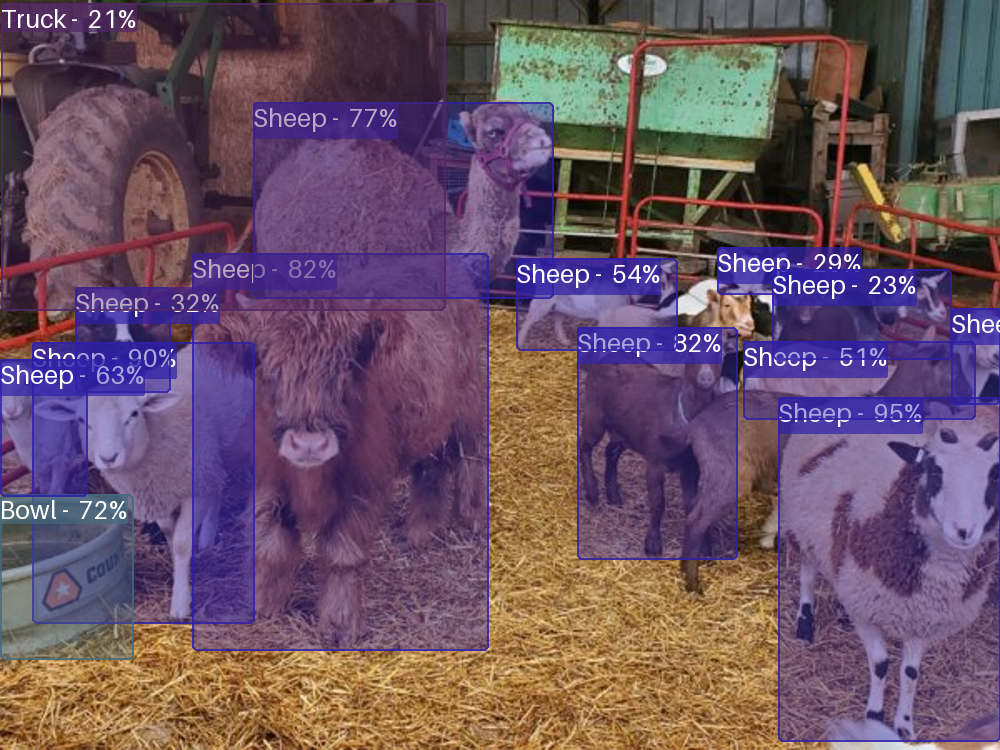

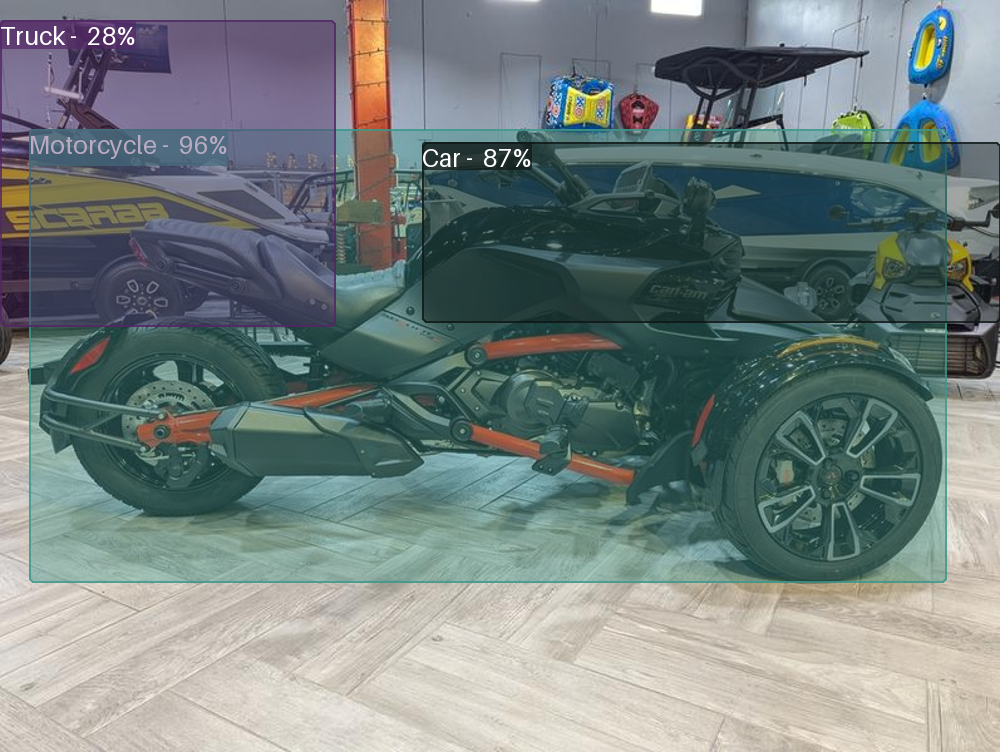

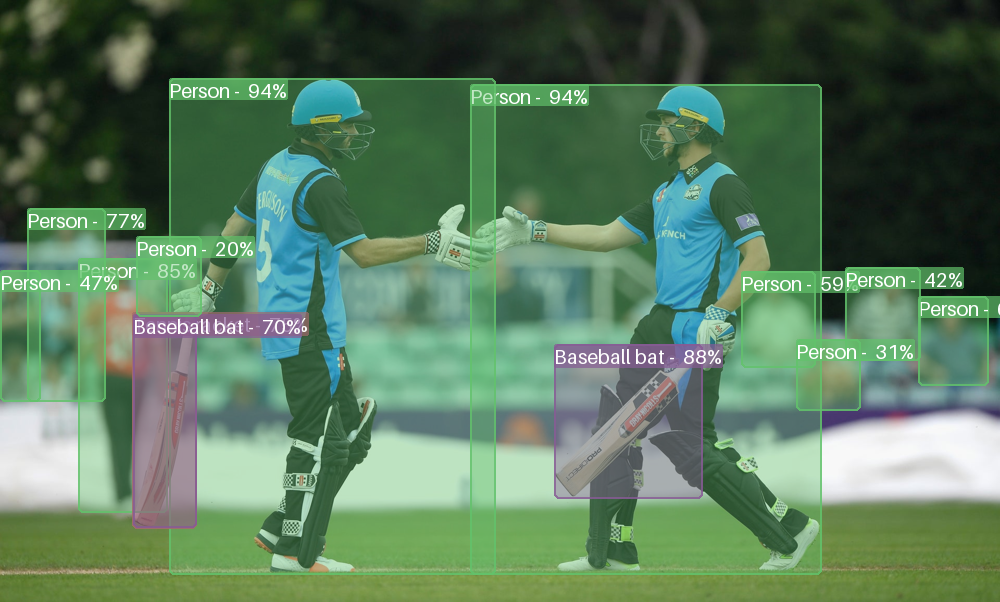

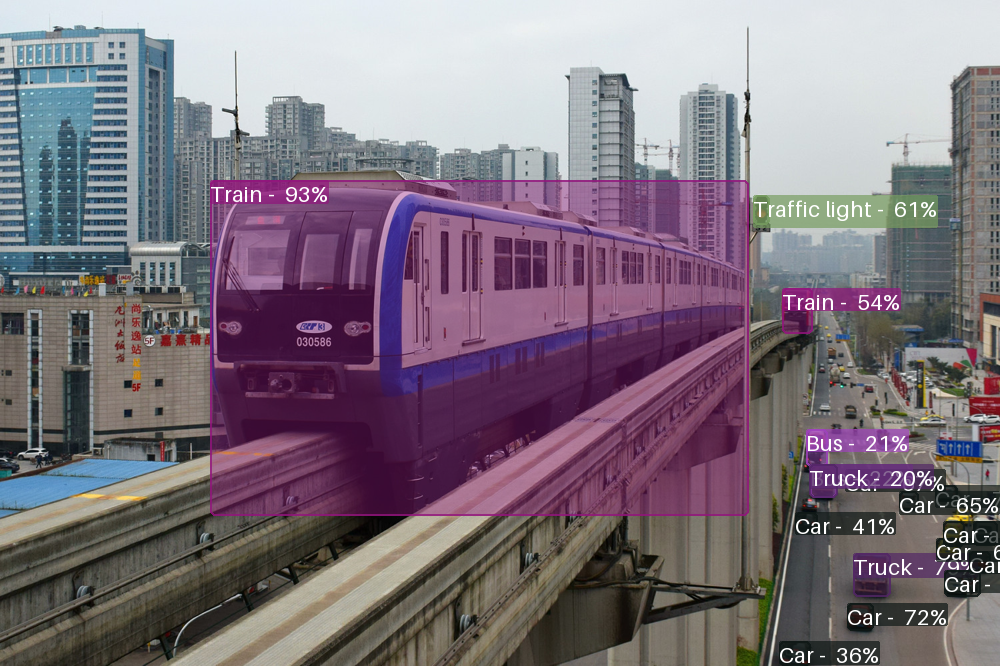

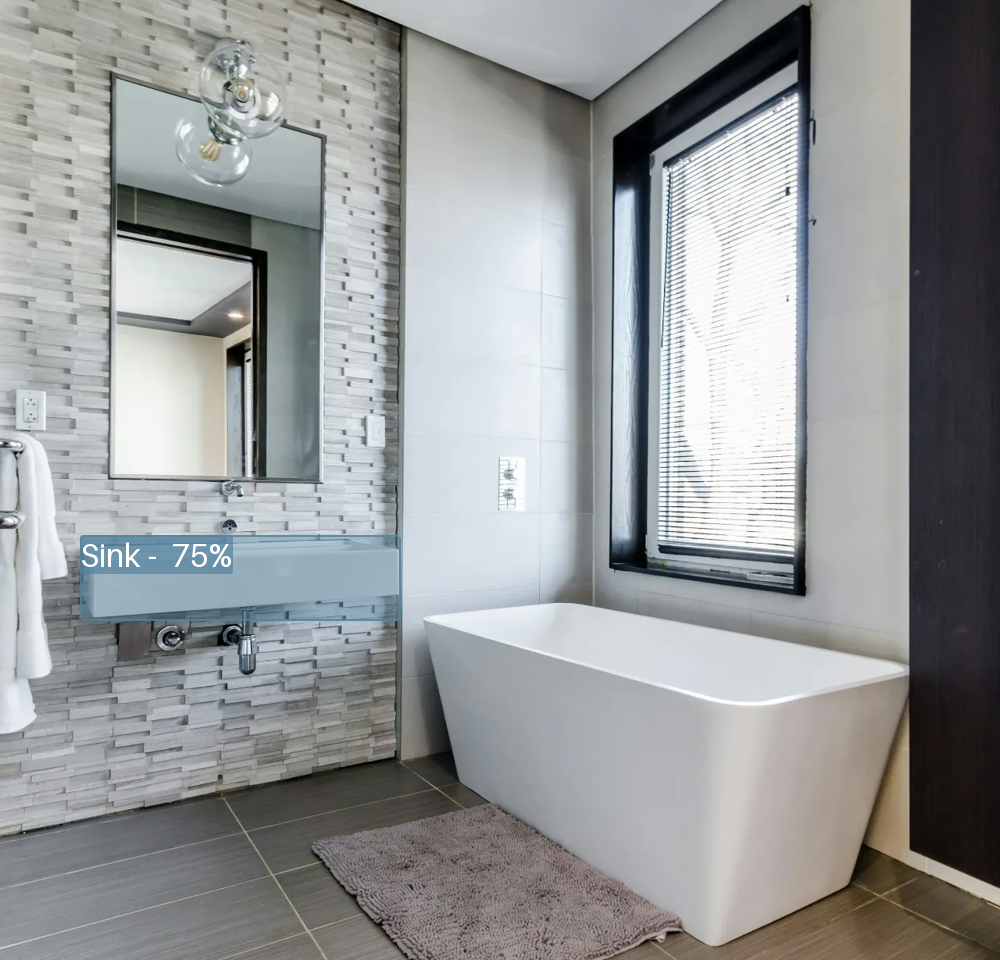

In [19]:
for object_predictions, image in zip(object_predictions_batch, input_images):
    visualize_object_predictions(
        image, object_predictions, dataset_config.class_list, True
    )